In [ ]:
!pip install ultralytics
!pip install torch
!pip install opencv-python
!pip install matplotlib
!pip install Pillow
!pip install transformers

In [1]:
from ultralytics import YOLO
import numpy as np
import torch
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from transformers import CLIPModel, CLIPProcessor
from torchvision import datasets, models, transforms


In [2]:



import sys
sys.path.append('/content/drive/MyDrive/pipeline')
from pipeline import CLIPPredictor, ImageObjectPipeline, ResNetPredictor


In [3]:
import os
 # Prints the current working directory
os.chdir('/content/drive/MyDrive/pipeline')
print(os.getcwd())
HOME = os.getcwd()

/content/drive/MyDrive/pipeline


In [4]:
#ResNet50 load model
class_names = ['Statins', 'Nitrates', 'Heart-Failure-Medications', 'Antiplatelet-Agents',
               'Antihypertensives', 'Anticoagulants', 'Antiarrhythmics', 'Combination-Medications', 'Other']

In [5]:
model_path = 'resnet_weights.pth'

In [6]:
resnet50_predictor = ResNetPredictor(model_path=model_path, class_names=class_names, device='cuda')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# Initialize ResNetPredictor with class_names already part of it
resnet50_predictor = ResNetPredictor(model_path=model_path, class_names=class_names, device='cuda')

# Initialize YOLOv8 model with the trained weights
yolo_path = os.path.join(HOME, 'train17/weights/best.pt')
yolo_model = YOLO(yolo_path)

# Initialize the pipeline
pipeline = ImageObjectPipeline(yolo_model, resnet50_predictor)


image 1/1 /content/drive/MyDrive/pipeline/sample/8classes/1677851854666_148_png.rf.1be3b2cdc81fb7152ae95702ae9c781c.jpg: 640x640 1 apranax, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
bbox prediction from YOLOv8: [          0      169.19      634.01      455.24]
Object 1: Predicted class: Statins (confidence: 0.5178)


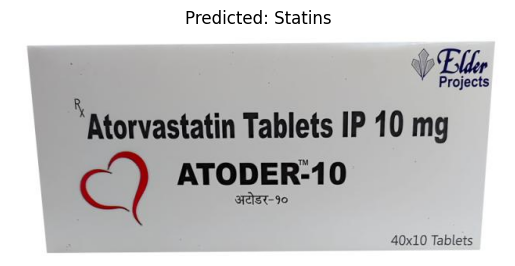

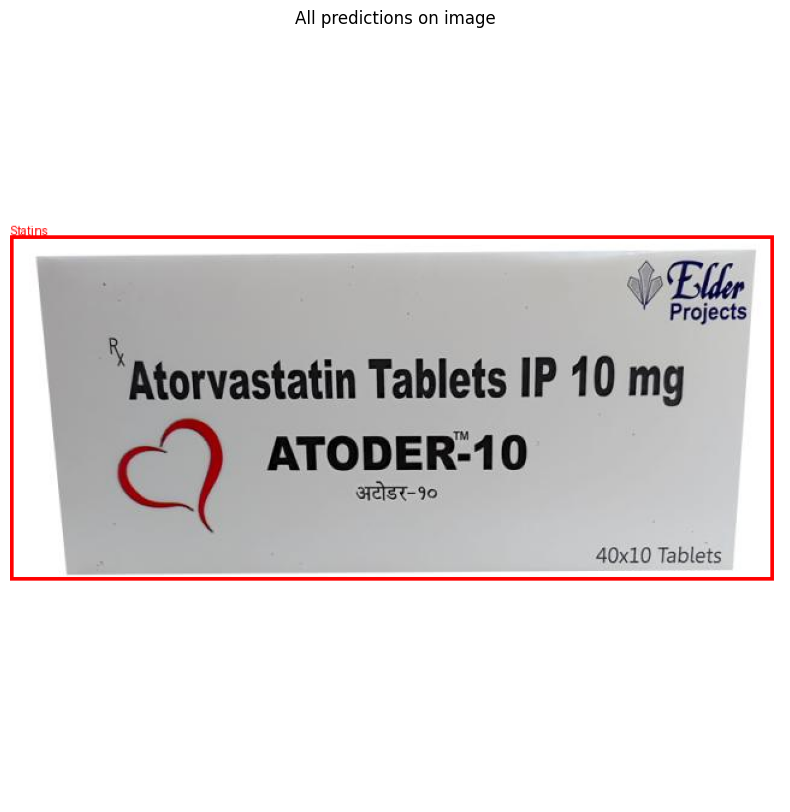

In [40]:
img_path = '/content/drive/MyDrive/pipeline/sample/8classes/1677851854666_148_png.rf.1be3b2cdc81fb7152ae95702ae9c781c.jpg'
pipeline.process_image(os.path.join(HOME, img_path), class_names)



image 1/1 /content/drive/MyDrive/pipeline/sample/8classes/ator20clopi75_webp.rf.8a93b3efe9e4113f40f3ad0ea4683ff8.jpg: 640x640 1 dolorex, 10.9ms
Speed: 6.4ms preprocess, 10.9ms inference, 159.9ms postprocess per image at shape (1, 3, 640, 640)
bbox prediction from YOLOv8: [     41.198      107.01      600.28      446.24]
Object 1: Predicted class: Statins (confidence: 0.3605)


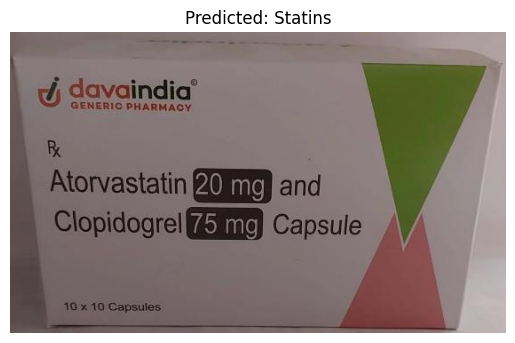

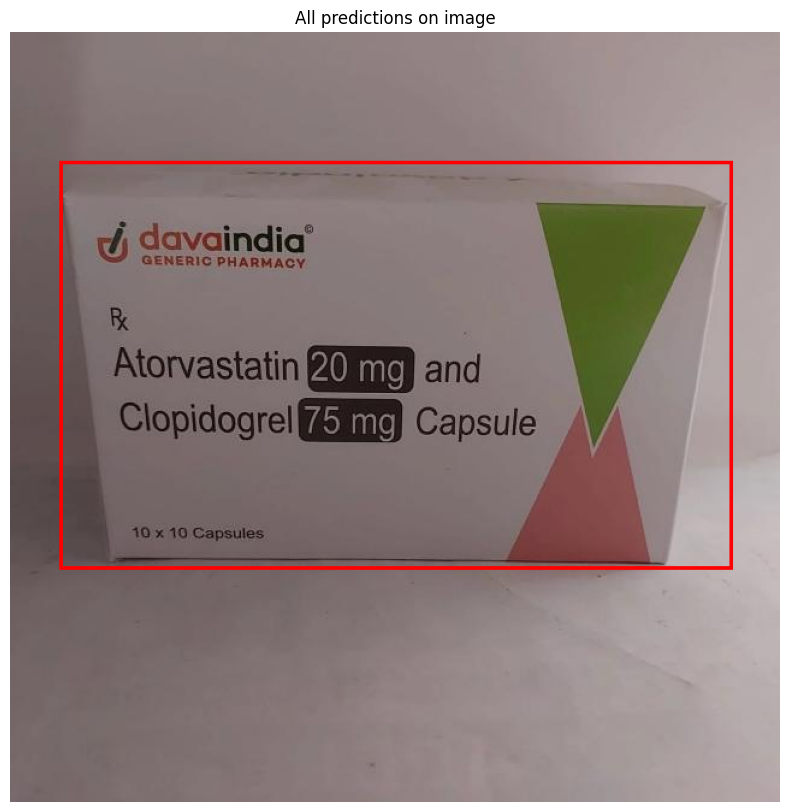

In [8]:
img_path = '/content/drive/MyDrive/pipeline/sample/8classes/ator20clopi75_webp.rf.8a93b3efe9e4113f40f3ad0ea4683ff8.jpg'
pipeline.process_image(os.path.join(HOME, img_path), class_names)
